In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.4/8062.4 GB disk)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# Import thư viện
import os
import yaml
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import Counter
from PIL import Image
from ultralytics import YOLO
import multiprocessing
import torch
from glob import glob

In [ ]:
def main():
    model = YOLO("yolov8n.yaml")
    model.train(
        data='/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml',
        epochs=200,
        imgsz=640,
        batch=64,
        pretrained=False,
        device="cuda",
        verbose=True,
        plots=True,
        patience=30,
        resume=True,
        
        #Tăng cường
        degrees=10,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        perspective=0.001,
        flipud=0.2,
        fliplr=0.5,
        mosaic=0.8,
        mixup=0.2,
        copy_paste=0.2,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.5
    )

if __name__ == '__main__':
    multiprocessing.freeze_support()
    main()

In [7]:
# Đánh giá mô hình trên Test YOLOv8n
model = YOLO("/kaggle/input/yolov8-nano/pytorch/tomato/1/yolov8n.pt")
model.to('cuda')

data_yaml = "/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/data.yaml"

if __name__ == '__main__':
    metrics = model.val(data=data_yaml, split='test', save_json=True)

YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 153.1±38.5 MB/s, size: 78.4 KB)
val: Scanning /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test/labels... 616 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 616/616 827.1it/s 0.7s
WARNING ⚠️ val: Cache directory /kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 39/39 4.5it/s 8.7s
                   all        616       2297      0.861      0.911      0.922      0.787
          Early Blight        201        290      0.915      0.897      0.965      0.853
               Healthy         71        292      0.845      0.822      0.913      0.721
           Late Blight        162        238      0.878      0.929      0.908      0.788
            Leaf Miner        121        168       0.88      0.96


0: 640x640 2 Late Blights, 1 Leaf Mold, 1 Septoria, 4.5ms
1: 640x640 1 Late Blight, 1 Leaf Mold, 1 Mosaic Virus, 2 Yellow Leaf Curl Viruss, 4.5ms
2: 640x640 1 Late Blight, 2 Leaf Molds, 1 Septoria, 4.5ms
3: 640x640 1 Healthy, 1 Leaf Mold, 4.5ms
4: 640x640 11 Healthys, 4.5ms
5: 640x640 14 Late Blights, 4.5ms
6: 640x640 1 Late Blight, 2 Mosaic Viruss, 1 Septoria, 4.5ms
7: 640x640 1 Leaf Miner, 1 Spider Mites, 2 Yellow Leaf Curl Viruss, 4.5ms
8: 640x640 1 Late Blight, 2 Septorias, 1 Spider Mites, 4.5ms
9: 640x640 1 Healthy, 1 Leaf Miner, 4.5ms
Speed: 2.3ms preprocess, 4.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


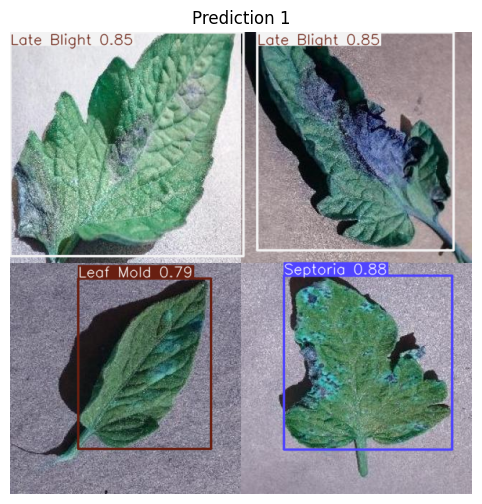

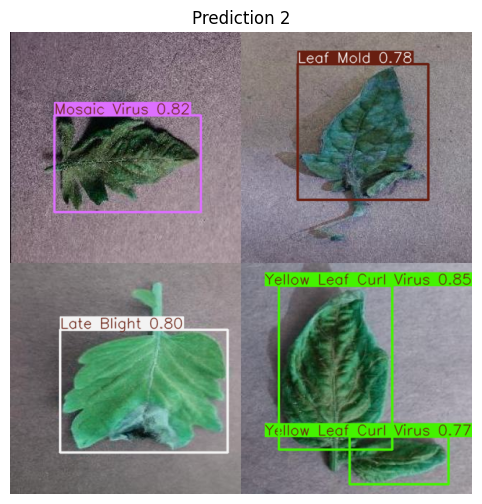

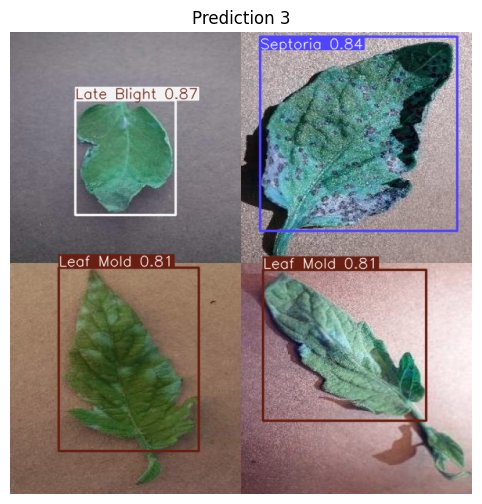

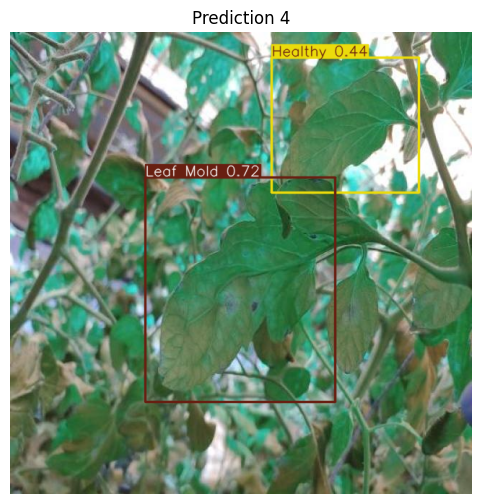

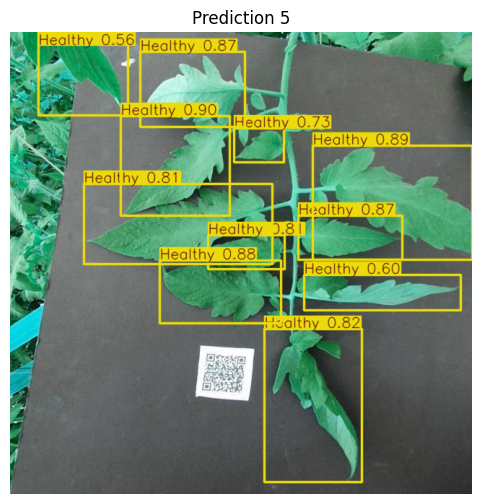

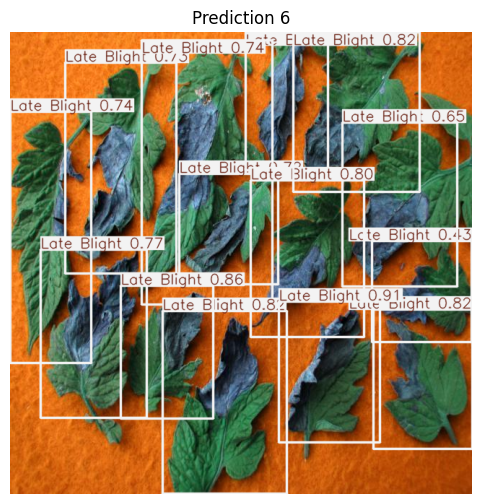

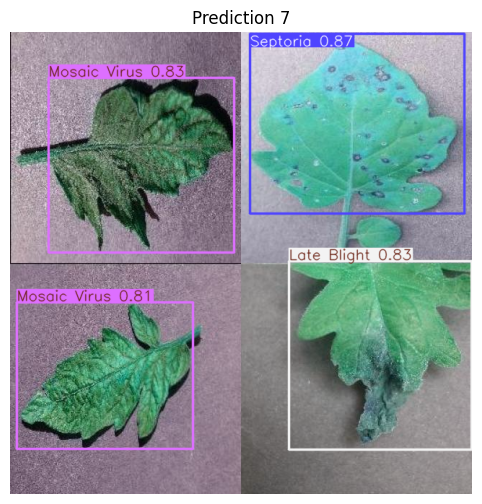

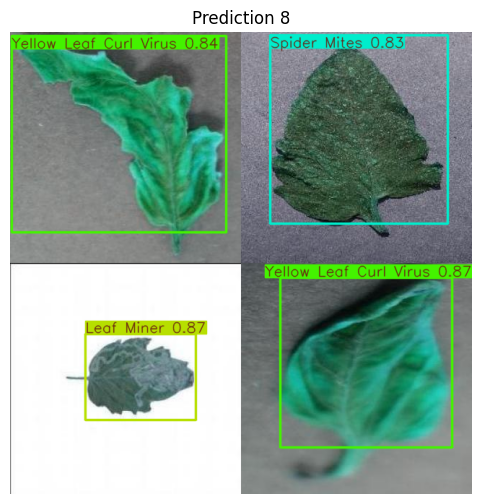

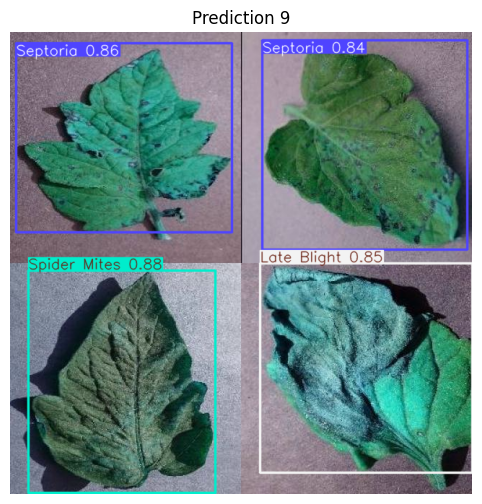

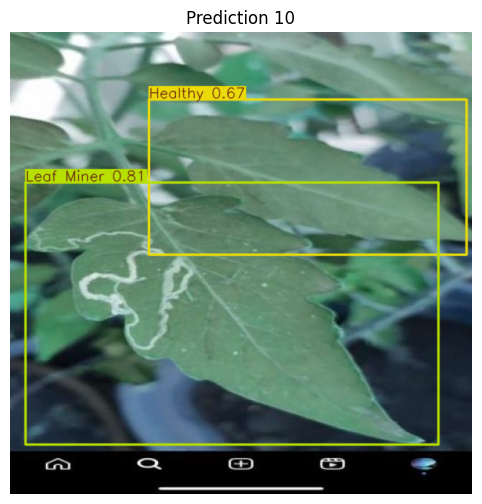

In [8]:
# Test nhận diện
model = YOLO("/kaggle/input/yolov8-nano/pytorch/tomato/1/yolov8n.pt")
model.to("cuda")

test_path_abs = '/kaggle/input/vietnameses-tomato-disease-dataset/YOLO/test/images'

image_paths = glob(os.path.join(test_path_abs, "*.jpg")) + glob(os.path.join(test_path_abs, "*.png"))

if len(image_paths) == 0:
    raise FileNotFoundError(f"Không tìm thấy ảnh nào trong thư mục test: {test_path_abs}")

sample_images = random.sample(image_paths, min(10, len(image_paths)))

results = model.predict(sample_images, save=False, conf=0.4)

for i, result in enumerate(results):
    im = result.plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"Prediction {i+1}")
    plt.show()